In [ ]:
pip install plotly
pip install kneed

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import scipy.stats
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator

In [3]:
city_years = {
 'Francisco_Bay':[2016,2017,2018,2019,2020,2021,2022,2023],
}

In [4]:
path = '/Users/zahrafarook/Desktop/DataAnalysis/data'
dir_list = os.listdir(path)
print(dir_list)

['cnc', 'Virginia', '.DS_Store', 'San_Franciso', 'France', 'San_Francisco_Bay_2020.csv', 'San_Francisco_Bay_2021.csv', 'census_ethnicities', 'San_Francisco_Bay_2023.csv', 'San_Francisco_Bay_2022.csv', 'Sri_Lanka', 'Los_Angeles_2017.csv', 'San_Francisco_Bay_2019.csv', 'San_Francisco_Bay_2018.csv', 'non_cnc', 'Bolivia', 'San_Francisco_Bay_2016.csv', 'northcarolina', 'UK', 'San_Francisco_Bay_2017.csv', 'Los_Angeles', 'India', 'Texas', 'old data']


In [5]:
dfs = defaultdict(dict)
dfall = []


for city, years in city_years.items():
    for year in years:
        print("Loading: ", city, year)

        df = pd.read_csv("/Users/zahrafarook/Desktop/DataAnalysis/data/San_{}_{}.csv".format(city, year))
       
        #creating a column to add weekend or weekday
        df['time_observed_at'] = pd.to_datetime(df['time_observed_at'], utc=True)
        df['day_of_week'] = df['time_observed_at'].dt.dayofweek
        df['day_type'] = df['time_observed_at'].apply(lambda x: 'Weekend' if x.weekday() in [5, 6] else 'Weekday')
        dfs[city][year] = df
        dfall.append(df)

dfall = pd.concat(dfall)
dfs['Francisco_Bay'][2016].head()

Loading:  Francisco_Bay 2016
Loading:  Francisco_Bay 2017
Loading:  Francisco_Bay 2018
Loading:  Francisco_Bay 2019
Loading:  Francisco_Bay 2020
Loading:  Francisco_Bay 2021
Loading:  Francisco_Bay 2022
Loading:  Francisco_Bay 2023


,id,observed_on_string,observed_on,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,quality_grade,...,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications,day_of_week,day_type
0,20069,1:15 pm.,2016-07-14,2016-07-14 20:15:00+00:00,America/Los_Angeles,2011-06-03T14:51:45-07:00,2020-02-09T08:18:18-08:00,Seen in grass. Individual had >5 ticks from e...,1704,casual,...,genus,797512.0,False,False,False,36300.0,36300.0,"[{'user_id': 1704, 'category': 'leading', 'dis...",3.0,Weekday
1,20070,1:00 pm.,2016-03-25,2016-03-25 20:00:00+00:00,America/Los_Angeles,2011-06-03T14:53:13-07:00,2020-02-09T08:18:11-08:00,Female mallard duck with multiple ducklings.,1704,casual,...,species,6922.0,True,False,False,462859.0,462859.0,"[{'user_id': 642, 'category': 'leading', 'disa...",4.0,Weekday
2,68373,6:30,2016-02-12,2016-02-12 14:30:00+00:00,America/Los_Angeles,2012-04-20T20:36:48-07:00,2020-08-01T14:11:59-07:00,This flower has blue/purple petals that are di...,5844,casual,...,genus,632394.0,False,False,False,98028.0,98028.0,"[{'user_id': 5844, 'category': 'leading', 'dis...",4.0,Weekday
3,158736,2:19,2016-10-14,2016-10-14 21:19:00+00:00,America/Los_Angeles,2012-12-06T20:23:52-08:00,2016-10-14T01:56:44-07:00,We saw our first devil's coach-horse beetle as...,11548,casual,...,species,1270925.0,False,False,False,10365.0,10365.0,"[{'user_id': 11548, 'category': 'leading', 'di...",4.0,Weekday
4,538018,2016-04-10 2:20:00 PM PDT,2016-04-10,2016-04-10 21:20:00+00:00,America/Los_Angeles,2014-02-20T15:40:40-08:00,2016-04-10T21:06:27-07:00,NaN,16603,research,...,species,36141.0,True,False,False,119535.0,119535.0,"[{'user_id': 16603, 'category': 'improving', '...",6.0,Weekend


In [6]:
sf_2016 = dfs['Francisco_Bay'][2016]
sf_2017 = dfs['Francisco_Bay'][2017]
sf_2018 = dfs['Francisco_Bay'][2018]
sf_2019 = dfs['Francisco_Bay'][2019]
sf_2020 = dfs['Francisco_Bay'][2020]
sf_2021 = dfs['Francisco_Bay'][2021]
sf_2022 = dfs['Francisco_Bay'][2022]
sf_2023 = dfs['Francisco_Bay'][2023]

In [7]:
sf_2016.head()

,id,observed_on_string,observed_on,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,quality_grade,...,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications,day_of_week,day_type
0,20069,1:15 pm.,2016-07-14,2016-07-14 20:15:00+00:00,America/Los_Angeles,2011-06-03T14:51:45-07:00,2020-02-09T08:18:18-08:00,Seen in grass. Individual had >5 ticks from e...,1704,casual,...,genus,797512.0,False,False,False,36300.0,36300.0,"[{'user_id': 1704, 'category': 'leading', 'dis...",3.0,Weekday
1,20070,1:00 pm.,2016-03-25,2016-03-25 20:00:00+00:00,America/Los_Angeles,2011-06-03T14:53:13-07:00,2020-02-09T08:18:11-08:00,Female mallard duck with multiple ducklings.,1704,casual,...,species,6922.0,True,False,False,462859.0,462859.0,"[{'user_id': 642, 'category': 'leading', 'disa...",4.0,Weekday
2,68373,6:30,2016-02-12,2016-02-12 14:30:00+00:00,America/Los_Angeles,2012-04-20T20:36:48-07:00,2020-08-01T14:11:59-07:00,This flower has blue/purple petals that are di...,5844,casual,...,genus,632394.0,False,False,False,98028.0,98028.0,"[{'user_id': 5844, 'category': 'leading', 'dis...",4.0,Weekday
3,158736,2:19,2016-10-14,2016-10-14 21:19:00+00:00,America/Los_Angeles,2012-12-06T20:23:52-08:00,2016-10-14T01:56:44-07:00,We saw our first devil's coach-horse beetle as...,11548,casual,...,species,1270925.0,False,False,False,10365.0,10365.0,"[{'user_id': 11548, 'category': 'leading', 'di...",4.0,Weekday
4,538018,2016-04-10 2:20:00 PM PDT,2016-04-10,2016-04-10 21:20:00+00:00,America/Los_Angeles,2014-02-20T15:40:40-08:00,2016-04-10T21:06:27-07:00,NaN,16603,research,...,species,36141.0,True,False,False,119535.0,119535.0,"[{'user_id': 16603, 'category': 'improving', '...",6.0,Weekend


# Calculate participation

## Get number of observations and identifications

In [8]:
def get_obs_ident_per_users(dfcity,year):
    """ Calculate the number of observations and identifications per user 
    
    Input:
    ------
     - dfcity: pd.DataFrame
         The observations data for one city.
     - year: int
         The year corresponding to the observations data.
    
    Returns:
    -------
     - dfobsident: pd.DataFrame
         Has the columns: user_id | year | n_obs | n_idents
    """
    
    n_obs = defaultdict(int)
    n_idents = defaultdict(int)
    
    for _, row in dfcity.iterrows():
        # Total count of observation made by each users
        user_obs = row['user_id']
        n_obs[user_obs] += 1 # Increment observation count for the user
        
        # Total identification user made
        identifications = row['identifications']
        if not pd.isnull(identifications):  # Check if 'identifications' is not NaN
            identifications = eval(identifications)
            for ident in identifications:
                user_ident = ident['user_id']
                if user_ident != user_obs:
                    n_idents[user_ident] += 1 # Increment identification count for the user
    
    # Aggregating results into a list of dictionaries
    obs_ident_list = []
    for user_id, obs_count in n_obs.items():
        obs_ident_list.append({
            'user_id': user_id,
            'n_obs': obs_count,
            'n_idents': n_idents[user_id],
            'day_type': row['day_type'],  # Include the 'day_type' column in the result
            'year': year,
            'time_observed_at': row['time_observed_at']
            
            
        })
    
    # Create DataFrame from the list of dictionaries
    dfobsident = pd.DataFrame(obs_ident_list)
    
    return dfobsident

In [9]:
# Initialize empty dictionary to store results for each year
sf_dataframes = {}

# Iterate over the years
for year in range(2016, 2024):
    # Extract DataFrame for the current year and city 'SF'
    dfcity = dfs['Francisco_Bay'][year]
    # Process data for the current year
    sf_dataframes[year] = get_obs_ident_per_users(dfcity, year)

#access dataframe for each year

In [10]:
sf_2016 = sf_dataframes[2016]
sf_2017 = sf_dataframes[2017]
sf_2018 = sf_dataframes[2018]
sf_2019 = sf_dataframes[2019]
sf_2020 = sf_dataframes[2020]
sf_2021 = sf_dataframes[2021]
sf_2022 = sf_dataframes[2022]
sf_2023 = sf_dataframes[2023]

In [11]:
df= [sf_2016,sf_2017,sf_2018,sf_2019,sf_2020,sf_2021,sf_2022,sf_2023]

In [12]:
#Test with SF_2016 dataset 

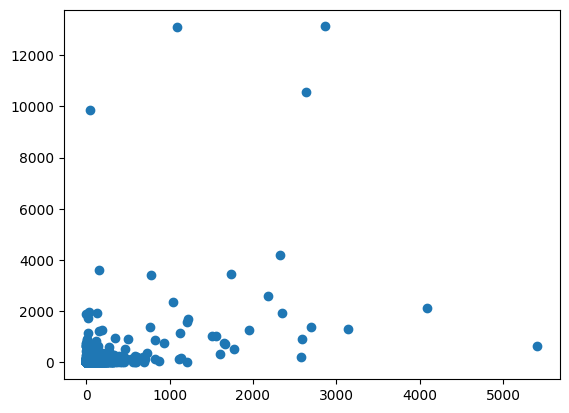

In [13]:
#Plot
plt.scatter(sf_2016['n_obs'],sf_2016['n_idents'])

In [ ]:
km = KMeans(n_clusters =4)
km

In [ ]:
y_predicted = km.fit_predict(sf_2016[['n_obs','n_idents']])
y_predicted

In [ ]:
sf_2016['cluster'] = y_predicted
sf_2016.head()

In [ ]:
df1 = sf_2016[sf_2016.cluster==0]
df2 = sf_2016[sf_2016.cluster==1]
df3 = sf_2016[sf_2016.cluster==2]

df4 = sf_2016[sf_2016.cluster==3]
plt.scatter(df1['n_obs'],df1['n_idents'], color = 'green')
plt.scatter(df2['n_obs'],df2['n_idents'], color = 'red')
plt.scatter(df3['n_obs'],df3['n_idents'], color = 'yellow')
plt.scatter(df4['n_obs'],df4['n_idents'], color = 'black')

#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*', label='centroid')

plt.xlabel('Observation')
plt.ylabel('Identification')


### Normalise the data 

In [13]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the specified columns
scaler.fit(sf_2016[['n_obs', 'n_idents']])

# Transform the specified columns using the scaler
sf_2016[['n_obs', 'n_idents']] = scaler.transform(sf_2016[['n_obs', 'n_idents']])
sf_2016.head()

,user_id,n_obs,n_idents,day_type,year,time_observed_at
0,1704,0.000185,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00
1,5844,0.000000,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00
2,11548,0.000370,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00
3,16603,0.023691,0.009149,Weekday,2016,2016-01-12 20:41:00+00:00
4,38816,0.000000,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00


In [ ]:
km = KMeans(n_clusters =4)
y_predicted = km.fit_predict(sf_2016[['n_obs','n_idents']])
y_predicted

In [ ]:
km.cluster_centers_

In [1]:
df1 = sf_2016[sf_2016.cluster==0]
df2 = sf_2016[sf_2016.cluster==1]
df3 = sf_2016[sf_2016.cluster==2]
df4 = sf_2016[sf_2016.cluster==3]

plt.scatter(df1['n_obs'],df1['n_idents'], color = 'green')
plt.scatter(df2['n_obs'],df2['n_idents'], color = 'red')
plt.scatter(df3['n_obs'],df3['n_idents'], color = 'yellow')
plt.scatter(df4['n_obs'],df4['n_idents'], color = 'black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*', label='centroid')

plt.xlabel('Observation')
plt.ylabel('Identification')
plt.legend()

NameError: name 'sf_2016' is not defined

### Elbow plot method to see the optimial number of clusters

In [ ]:
#define k range
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(sf_2016[['n_obs','n_idents']])
    sse.append(km.inertia_)
    
# Find the optimal number of clusters using KneeLocator
kneedle = KneeLocator(k_range, sse, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow

# Print the optimal number of clusters
print(f"The optimal number of clusters is {optimal_k}")

In [ ]:
sse

In [ ]:
#plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse, marker='o', label='SSE')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method For Optimal k for SF 2016')
plt.legend()
plt.show()

In [ ]:
#https://www.youtube.com/watch?v=EItlUEPCIzM&t=557s

# K-means step by Step

# Data Collection & Analysis

## Preprocess data for K-means without log transformation

In [14]:
def selectfeature(df):
    # Select variables 
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column in the transformation
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to those two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std

# Test dataframe
data = selectfeature(sf_2016)
#print(data)

In [15]:
featured_data = selectfeature(sf_2016)
featured_data

,user_id,n_obs,n_idents
110,1,0.488062,0.806343
2738,14,0.000000,0.000000
726,17,0.025541,0.000076
15,28,0.429761,0.318618
1021,147,0.000740,0.000000
...,...,...,...
5688,7158309,0.000000,0.000000
5698,7286727,0.000000,0.000000
5690,7321468,0.000000,0.000000
5692,7413809,0.000000,0.000000


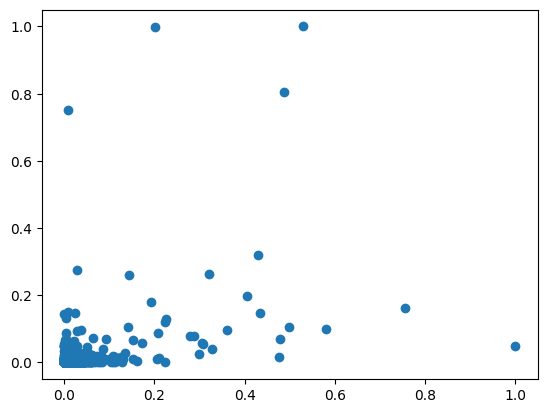

In [16]:
plt.scatter(featured_data['n_obs'],featured_data['n_idents'])

## Choosing the optimal number of clusters

In [17]:
def determine_k_clusters(df, feature_columns, plot=True):
    """
    Determines the optimal number of clusters using the Elbow Method.

    Parameters:
    df (pd.DataFrame): The input dataframe containing the data to be clustered.
    feature_columns (list): A list of column names to be used as features for clustering.
    plot (bool): Whether to plot the Elbow Method graph. Default is True.

    Returns:
    list: A list of SSE values for each number of clusters in k_range.
    int: The optimal number of clusters.
    """
    k_range = range(1, 11)
    sse = []

    for k in k_range:
        km = KMeans(n_clusters=k)
        km.fit(df[feature_columns])
        sse.append(km.inertia_)

    # Find the optimal number of clusters using KneeLocator
    kneedle = KneeLocator(k_range, sse, curve="convex", direction="decreasing")
    optimal_k = kneedle.elbow

    # Print the optimal number of clusters
    print(f"The optimal number of clusters is {optimal_k}")

    # Plot the SSE against k values and mark the optimal number of clusters
    if plot:
        plt.figure(figsize=(5, 4))
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Sum of squared error (SSE)')
        plt.plot(k_range, sse, marker='o', label='SSE')
        plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
        #plt.text(optimal_k, max(sse)/2, f'Optimal k={optimal_k}', color='red')
        plt.title(f'Optimal number of K - {year}', fontsize=12)
        plt.xticks(k_range)
        plt.grid(True)
        plt.legend()
        plt.show()

    return sse, optimal_k

In [18]:
def process_dataframe(df, year):
    # Selected data
    df_data = selectfeature(df)
    print(f"Processed DataFrame for year {year}:")
    print(df_data.head())

    # Determine optimal number of clusters
    sse, optimal_k = determine_k_clusters(df_data, feature_columns=['n_obs', 'n_idents'])
    
    return df_data, sse, optimal_k

Processed DataFrame for year 2016:
      user_id     n_obs  n_idents
110         1  0.488062  0.806343
2738       14  0.000000  0.000000
726        17  0.025541  0.000076
15         28  0.429761  0.318618
1021      147  0.000740  0.000000
The optimal number of clusters is 3


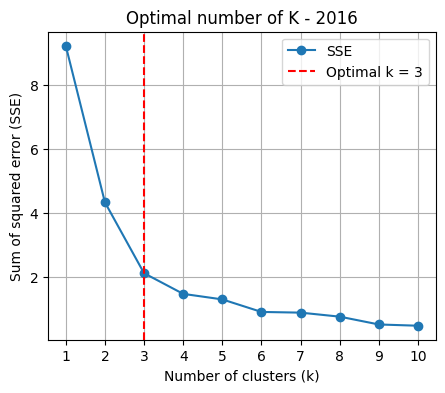

SSE for year 2016: [9.22767013989937, 4.337810692951053, 2.1226090628317023, 1.4773154931322519, 1.30477582812527, 0.9131744366030375, 0.8913244103599526, 0.7655809059061555, 0.5215557354528138, 0.4826079409059197], Optimal k: 3
Processed DataFrame for year 2017:
      user_id     n_obs  n_idents
107         1  0.423756  0.330579
4686        5  0.000477  0.000000
1413       17  0.014152  0.000083
100        28  0.470186  0.181033
7582       48  0.001113  0.002727
The optimal number of clusters is 3


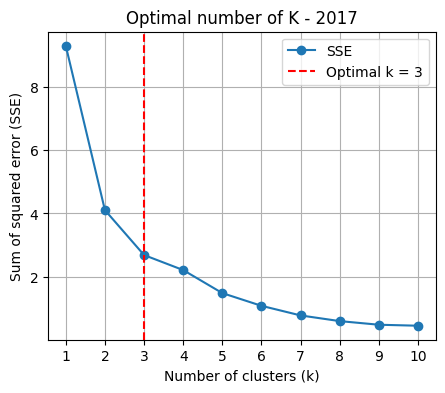

SSE for year 2017: [9.313154094987704, 4.107436042207296, 2.68388980821773, 2.2082419493081127, 1.4786135372009594, 1.075832410404608, 0.7714795154227347, 0.5916148426648755, 0.4768613468076549, 0.4456994904882493], Optimal k: 3
Processed DataFrame for year 2018:
      user_id     n_obs  n_idents
428         1  0.280809  0.161235
2094        5  0.001873  0.000000
4184       17  0.028843  0.000060
54         28  0.342115  0.065141
2405       48  0.001124  0.005408
The optimal number of clusters is 3


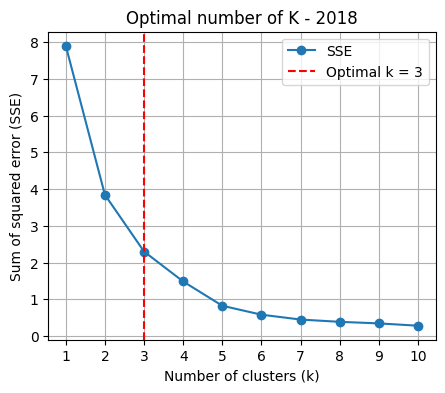

SSE for year 2018: [7.9029030057779295, 3.843767813039076, 2.298793177575512, 1.4828177374799303, 0.8219669341669992, 0.578782288434823, 0.44673177693827976, 0.38430538490964244, 0.34175319746760935, 0.27867260713242514], Optimal k: 3
Processed DataFrame for year 2019:
       user_id     n_obs  n_idents
326          1  0.168630  0.091925
5287         5  0.000000  0.000000
13288       14  0.000000  0.000000
14981       17  0.007854  0.000890
102         28  0.254796  0.031606
The optimal number of clusters is 4


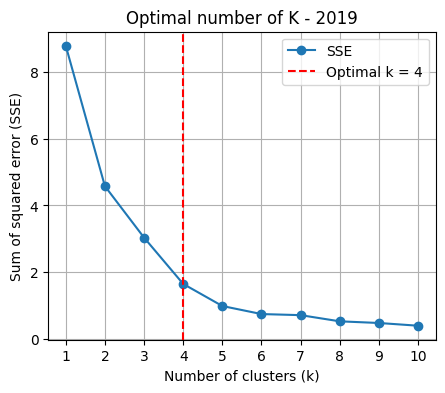

SSE for year 2019: [8.778314076014352, 4.5749406740531855, 3.0358471443014934, 1.649896461855025, 0.9885126619345642, 0.7479208212475478, 0.7153131035689304, 0.5304119241084133, 0.48059931114268284, 0.39888931595598354], Optimal k: 4
Processed DataFrame for year 2020:
       user_id     n_obs  n_idents
592          1  0.180276  0.243016
8122         5  0.000211  0.000000
118         17  0.004952  0.000000
269         28  0.347803  0.109972
13096      128  0.000211  0.000000
The optimal number of clusters is 3


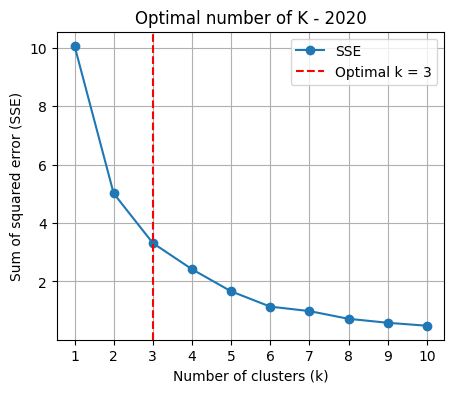

SSE for year 2020: [10.068738189972356, 5.01395602272506, 3.3142927178702464, 2.419115062059263, 1.6614078663027836, 1.1384198609341702, 0.9855496351566853, 0.7215321283104765, 0.5850886473214, 0.48445877743973415], Optimal k: 3
Processed DataFrame for year 2021:
      user_id     n_obs  n_idents
309         1  0.141981  0.152107
3271        5  0.000657  0.000000
354        17  0.003944  0.000000
79         28  0.205448  0.104405
8913       39  0.000000  0.000000
The optimal number of clusters is 3


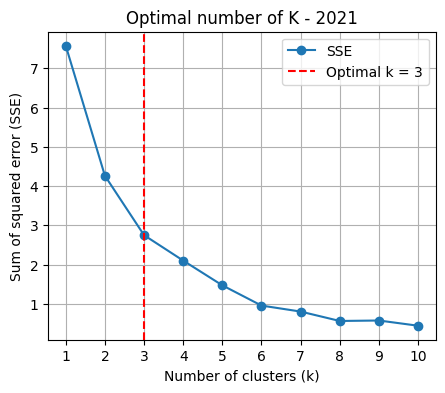

SSE for year 2021: [7.577265459447519, 4.263013048735392, 2.7490601665066112, 2.100972057817417, 1.4705815205093111, 0.9549348673203679, 0.8018105449663845, 0.5620701649390889, 0.5740998734992172, 0.4411205588838675], Optimal k: 3
Processed DataFrame for year 2022:
       user_id     n_obs  n_idents
1999         1  0.118565  0.167934
9202         5  0.002340  0.000000
10330       17  0.002405  0.000000
660         28  0.168487  0.170027
4343       181  0.005525  0.000000
The optimal number of clusters is 3


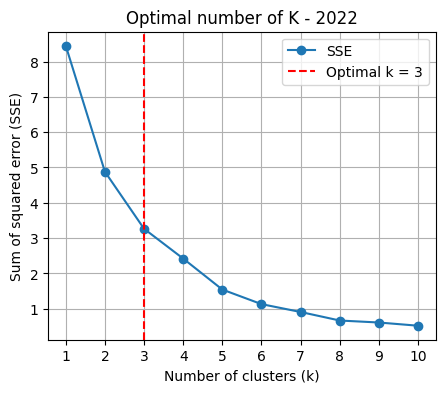

SSE for year 2022: [8.447153055890201, 4.880470766627053, 3.265640504505674, 2.4214175069810926, 1.5446222600652812, 1.1323815201181697, 0.9096490597499118, 0.6683393543298619, 0.611934518752222, 0.5210406358530847], Optimal k: 3
Processed DataFrame for year 2023:
       user_id     n_obs  n_idents
1972         1  0.067070  0.115412
9675         5  0.002438  0.000000
14535       17  0.001182  0.000000
16          28  0.172847  0.110217
13454       48  0.000813  0.000461
The optimal number of clusters is 4


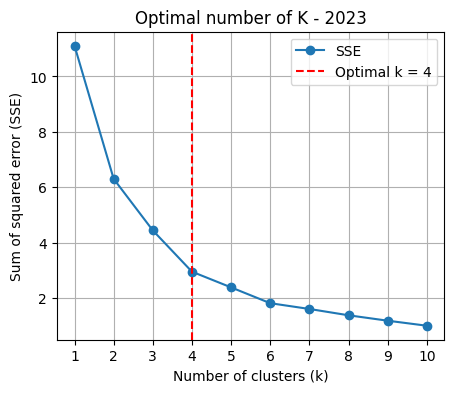

SSE for year 2023: [11.110351369528257, 6.300507886760206, 4.438501077986764, 2.946223658048179, 2.379341579871295, 1.8082392700109786, 1.5994699618523351, 1.3715095657221226, 1.1757279174573885, 0.9941651365944283], Optimal k: 4


In [19]:
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


# Call the function for all DataFrames
for df, year in zip(df_list, years):
    #rocess the DataFrame , see, and optimal number of cluster
    df_processed,sse, optimal_k = process_dataframe(df, year)
    print(f"SSE for year {year}: {sse}, Optimal k: {optimal_k}")

## Combine dataframe as one from year 2016- 2023

Processed DataFrame for year combined:
      user_id     n_obs  n_idents
1972        1  0.059084  0.047170
110         1  0.000032  0.000014
592         1  0.111277  0.172037
428         1  0.146246  0.138325
326         1  0.097758  0.091925
The optimal number of clusters is 3


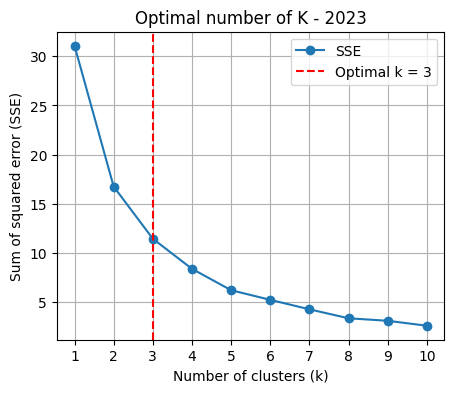

SSE for combined data: [31.069316618679423, 16.75288550345928, 11.451466533012912, 8.390611258873424, 6.21775832033369, 5.238585072411325, 4.2755981639156895, 3.3623357388070603, 3.1088121995822564, 2.606481878048179], Optimal k: 3


In [20]:
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]

# merge all DataFrames
combined_df = pd.concat(df_list)

# Verify the combined DataFrame
#print("Combined DataFrame:")
#print(combined_df)

# Call the function on the combined DataFrame
df_combined_processed, sse_combined, optimal_k_combined = process_dataframe(combined_df, "combined")

print(f"SSE for combined data: {sse_combined}, Optimal k: {optimal_k_combined}")

In [17]:
# merge all DataFrames
combined_df = pd.concat(df_list)
combined_df

NameError: name 'df_list' is not defined


# Training the k-Means Clustering Model
##  Optimum Number of Clusters = 3

### Perform K-means with optimal number of clusters 3 without log transfer

In [18]:
def selectfeature(df):
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column in the transformation
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to those two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def reorder_labels(df, kmeans):
    # Get the indices to sort the centroids by `n_obs` and `n_idents`
    centroids = kmeans.cluster_centers_
    sorted_indices = np.argsort(centroids[:, 0])  # Sort by `n_obs`
    
    # Create a mapping from old labels to new labels
    new_labels = np.zeros_like(kmeans.labels_)
    for old_label, new_label in enumerate(sorted_indices):
        new_labels[kmeans.labels_ == old_label] = new_label
    
    df['cluster'] = new_labels
    return df, centroids[sorted_indices]

def perform_kmeans_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = kmeans.labels_
    
    # Reorder labels -  Low Activity, Moderate Activity, and High Activity to be consistent
    df, ordered_centroids = reorder_labels(df, kmeans)

    # Assign labels based on the reordered clusters
    cluster_mapping = {0: 'Low Activity', 1: 'Moderate Activity', 2: 'High Activity'}
    df['activity_level'] = df['cluster'].map(cluster_mapping)

    # Get the centroid values
    centroids = kmeans.cluster_centers_

    # get the sum of the squared error (SSE or WCSS)
    sse = kmeans.inertia_

    # Create a dataframe from centroids for easier processing
    centroids_df = pd.DataFrame(centroids, columns=['n_obs', 'n_idents'])

    # Print centroids and SSE
    print("Centroids:\n", centroids_df)
    print(f"Sum of Squared Error (SSE): {sse}")
    
    # Plotting all the clusters and their Centroids
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], 
                    s=30, color=palette[i], label=cluster_mapping[i])
        
    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.6, marker='*', label='Centroids')

    # Set title and labels
    plt.title(f'User Clusters San Francisco- {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()

    return df, sse


Centroids:
       n_obs  n_idents
0  0.002568  0.000744
1  0.367100  0.106511
2  0.306589  0.889429
Sum of Squared Error (SSE): 2.1226090628317023


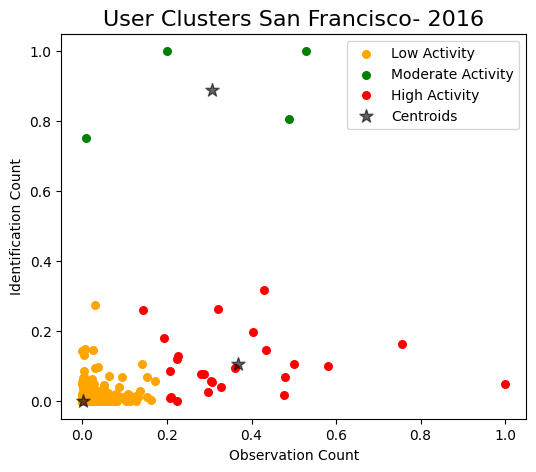

Centroids:
       n_obs  n_idents
0  0.002139  0.000355
1  0.788133  0.195980
2  0.219762  0.088030
Sum of Squared Error (SSE): 2.7066671948618897


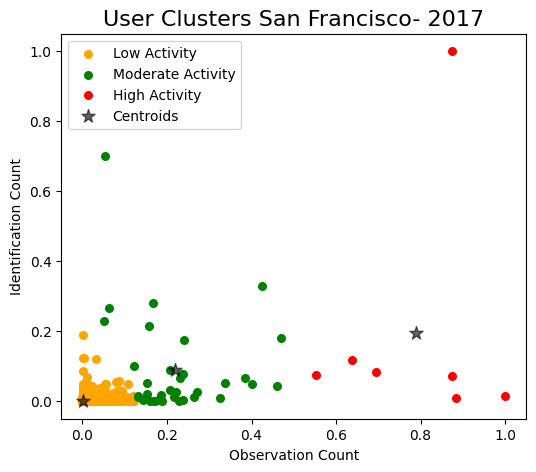

Centroids:
       n_obs  n_idents
0  0.001936  0.000220
1  0.337758  0.025809
2  0.627794  0.867074
Sum of Squared Error (SSE): 2.44802871128547


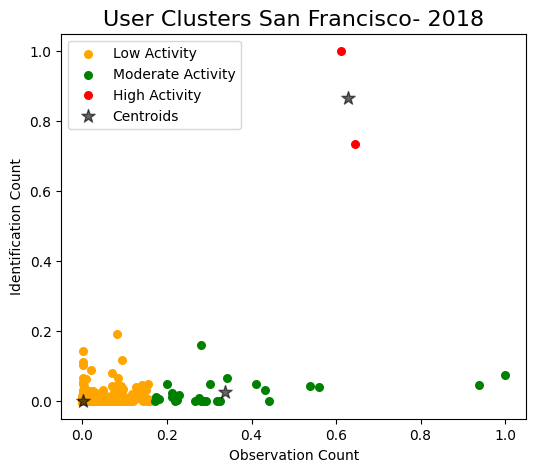

Centroids:
       n_obs  n_idents
0  0.131222  0.013874
1  0.611938  0.209037
2  0.001356  0.000121
Sum of Squared Error (SSE): 2.839584595366929


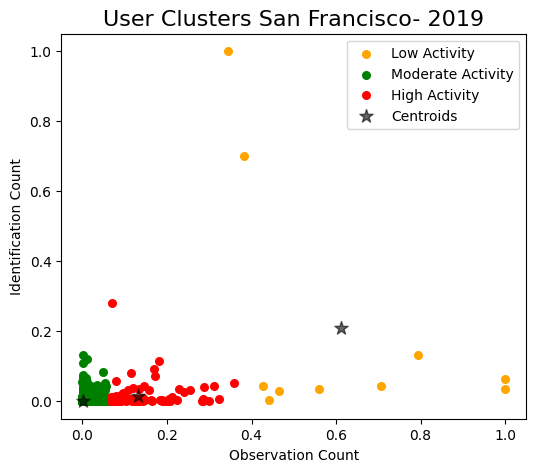

Centroids:
       n_obs  n_idents
0  0.001293  0.000138
1  0.519812  0.166719
2  0.132666  0.022554
Sum of Squared Error (SSE): 3.314791558790349


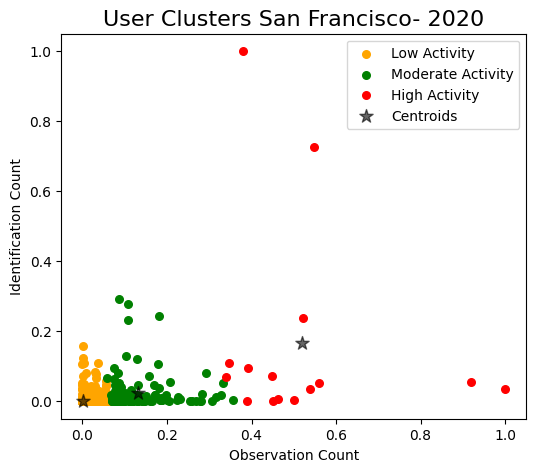

Centroids:
       n_obs  n_idents
0  0.001113  0.000141
1  0.176300  0.046634
2  1.000000  1.000000
Sum of Squared Error (SSE): 2.926147970761752


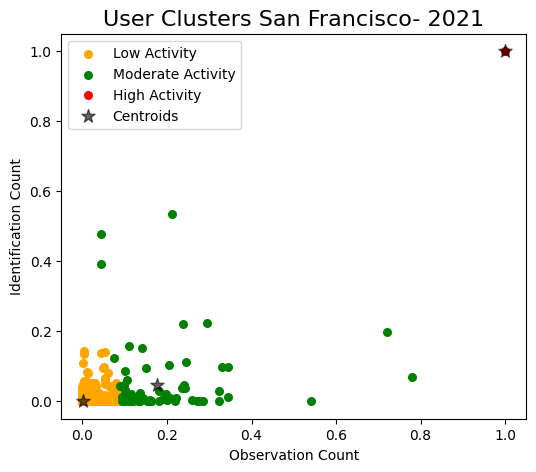

Centroids:
       n_obs  n_idents
0  0.000981  0.000152
1  0.121038  0.088955
2  0.698269  0.201837
Sum of Squared Error (SSE): 3.265640504505674


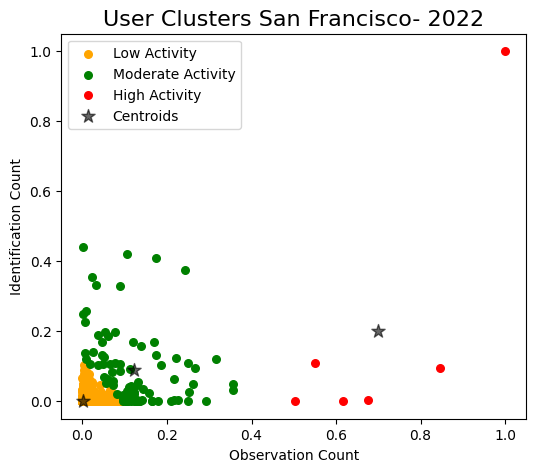

Centroids:
       n_obs  n_idents
0  0.001527  0.000266
1  0.664500  0.133604
2  0.116445  0.312290
Sum of Squared Error (SSE): 4.3611581414153795


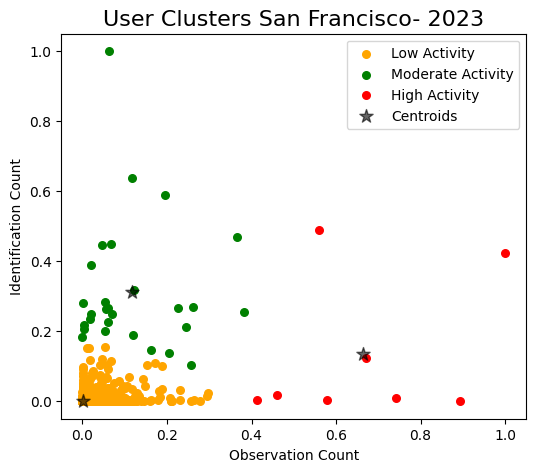

In [19]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_kmeans_clustering(df_processed, year)

## Perform K-means with optimal number of clusters 3 with log transformation

In [24]:
def log_transform(df):
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Add +1 to avoid log(0)
    df_std['n_obs'] = df_std['n_obs'] + 1
    df_std['n_idents'] = df_std['n_idents'] + 1

    # Apply log transformation
    df_std['n_obs'] = np.log(df_std['n_obs'])
    df_std['n_idents'] = np.log(df_std['n_idents'])

    # Scale the log-transformed features
    scaler = MinMaxScaler().fit(df_std[['n_obs', 'n_idents']])
    df_std[['n_obs', 'n_idents']] = scaler.transform(df_std[['n_obs', 'n_idents']])

    # Sort by user_id (optional, for consistency)
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler


def reorder_labels(df, kmeans):
    # Get the indices to sort the centroids by `n_obs` and `n_idents`
    centroids = kmeans.cluster_centers_
    sorted_indices = np.argsort(centroids[:, 0])  # Sort by `n_obs`
    
    # Create a mapping from old labels to new labels
    new_labels = np.zeros_like(kmeans.labels_)
    for old_label, new_label in enumerate(sorted_indices):
        new_labels[kmeans.labels_ == old_label] = new_label
    
    df['cluster'] = new_labels
    return df, centroids[sorted_indices]

def perform_kmeans_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = kmeans.labels_
    
    # Reorder labels -  Low Activity, Moderate Activity, and High Activity to be consistent
    df, ordered_centroids = reorder_labels(df, kmeans)

    # Assign labels based on the reordered clusters
    cluster_mapping = {0: 'Low Activity', 1: 'Moderate Activity', 2: 'High Activity'}
    df['activity_level'] = df['cluster'].map(cluster_mapping)

    # Get the centroid values
    centroids = kmeans.cluster_centers_

    # get the sum of the squared error (SSE or WCSS)
    sse = kmeans.inertia_

    # Create a dataframe from centroids for easier processing
    centroids_df = pd.DataFrame(centroids, columns=['n_obs', 'n_idents'])

    # Print centroids and SSE
    print("Centroids:\n", centroids_df)
    print(f"Sum of Squared Error (SSE): {sse}")
    
    # Plotting all the clusters and their Centroids
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], 
                    s=10, color=palette[i], label=cluster_mapping[i])
        
    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.6, marker='*', label='Centroids')

    # Set title and labels
    plt.title(f'User Clusters San Francisco - {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()

    return df, sse


Centroids:
       n_obs  n_idents
0  0.003596  0.001026
1  0.430754  0.139789
2  0.365456  0.915405
Sum of Squared Error (SSE): 2.911556530186685


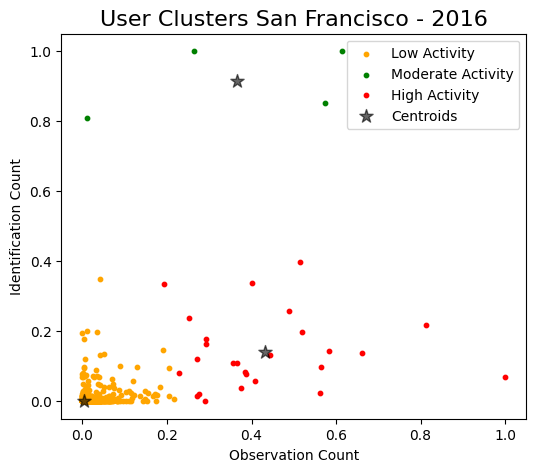

Centroids:
       n_obs  n_idents
0  0.277773  0.025241
1  0.043989  0.010546
2  0.474578  0.435467
Sum of Squared Error (SSE): 88.24589088497343


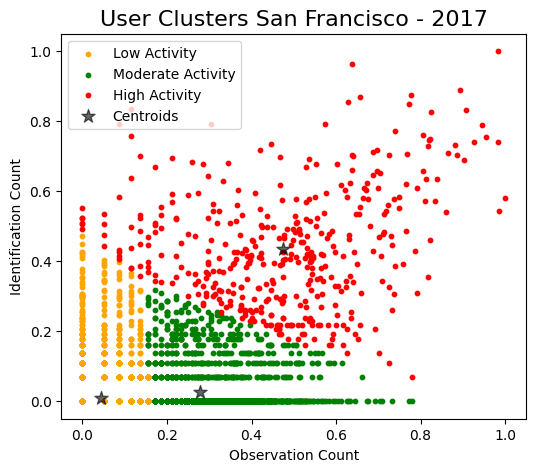

Centroids:
       n_obs  n_idents
0  0.038385  0.007192
1  0.477509  0.391484
2  0.259124  0.016096
Sum of Squared Error (SSE): 127.93185044077427


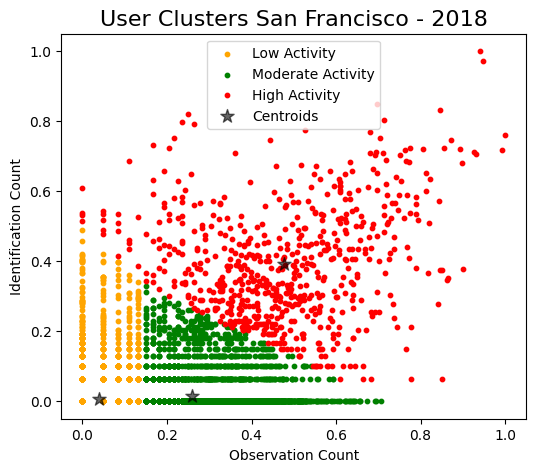

Centroids:
       n_obs  n_idents
0  0.267385  0.014090
1  0.041606  0.004988
2  0.470153  0.372982
Sum of Squared Error (SSE): 172.91139495445816


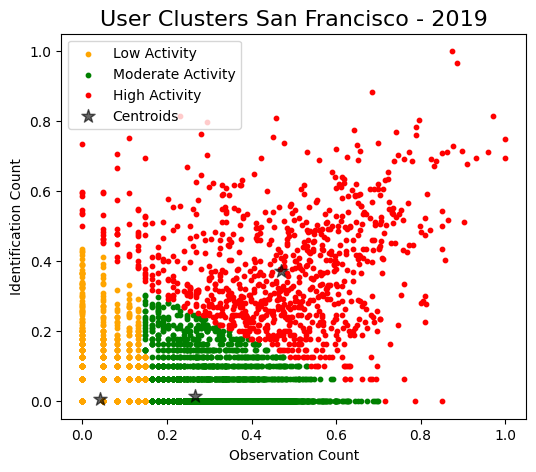

Centroids:
       n_obs  n_idents
0  0.043351  0.004427
1  0.267950  0.014073
2  0.484998  0.382892
Sum of Squared Error (SSE): 211.29012069798722


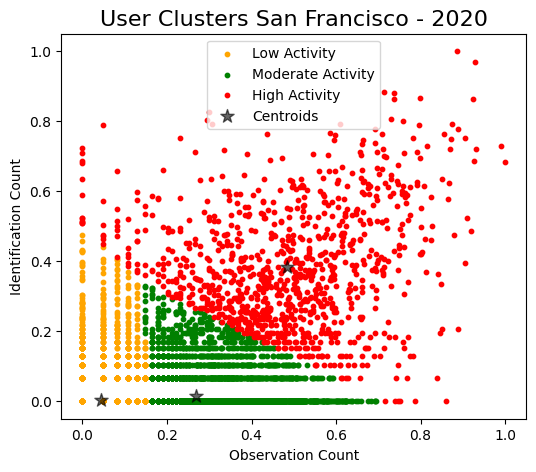

Centroids:
       n_obs  n_idents
0  0.044452  0.003300
1  0.272947  0.014220
2  0.483344  0.388123
Sum of Squared Error (SSE): 224.76254544012343


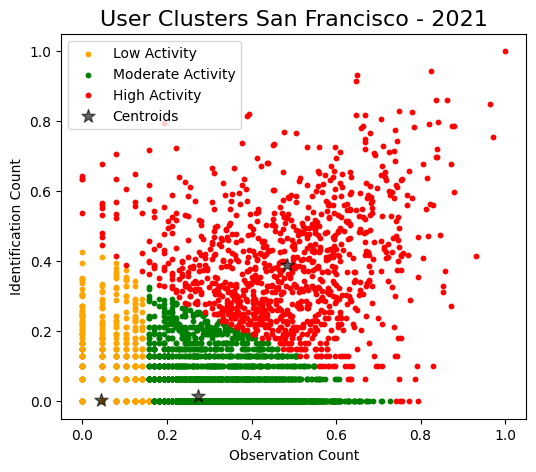

Centroids:
       n_obs  n_idents
0  0.039488  0.002970
1  0.258668  0.011401
2  0.450581  0.389968
Sum of Squared Error (SSE): 227.8185760153947


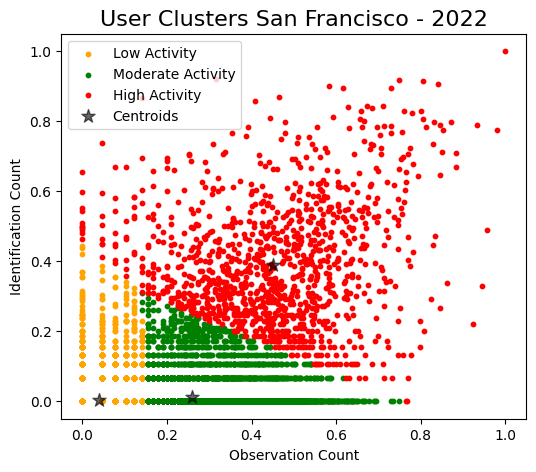

Centroids:
       n_obs  n_idents
0  0.049179  0.003068
1  0.291217  0.015216
2  0.465273  0.415898
Sum of Squared Error (SSE): 240.72540605459244


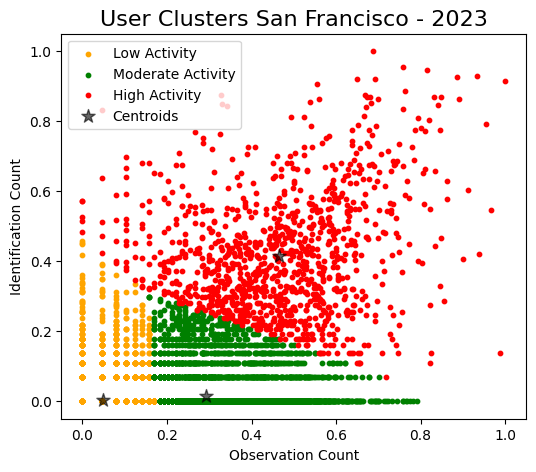

In [25]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = log_transform(df)
    perform_kmeans_clustering(df_processed, year)

Centroids:
       n_obs  n_idents
0  0.099880  0.003752
1  0.299864  0.011685
2  0.484306  0.371698
Sum of Squared Error (SSE): 1154.2159950987532


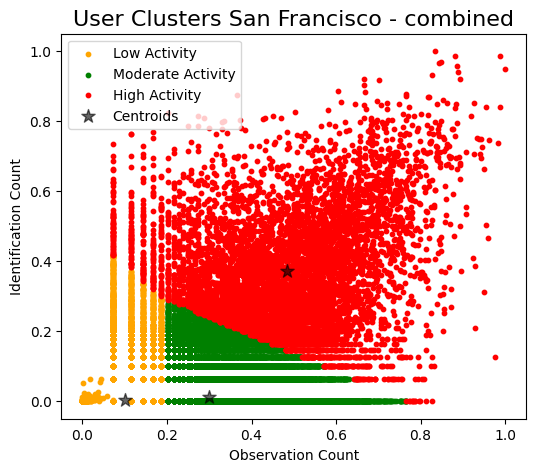

(       user_id     n_obs  n_idents  cluster     activity_level
 1972         1  0.706700  0.721767        2      High Activity
 110          1  0.041227  0.053876        0       Low Activity
 592          1  0.772310  0.839642        2      High Activity
 428          1  0.800639  0.819771        2      High Activity
 326          1  0.758883  0.782545        2      High Activity
 ...        ...       ...       ...      ...                ...
 32828  7693948  0.287577  0.000000        1  Moderate Activity
 32832  7694063  0.113950  0.000000        0       Low Activity
 32833  7694066  0.143788  0.000000        0       Low Activity
 32834  7694092  0.071894  0.000000        0       Low Activity
 32837  7694117  0.071894  0.000000        0       Low Activity
 
 [186640 rows x 5 columns],
 1154.2159950987532)

In [26]:
# Concatenate all the DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
combined_df = pd.concat(df_list)

# Process the combined DataFrame
df_combined_processed, scaler_combined = log_transform(combined_df)

# Perform clustering with 3 clusters on combined data
perform_kmeans_clustering(df_combined_processed, "combined")

Centroids:
       n_obs  n_idents
0  0.002568  0.000744
1  0.367100  0.106511
2  0.306589  0.889429
Sum of Squared Error (SSE): 2.1226090628317023


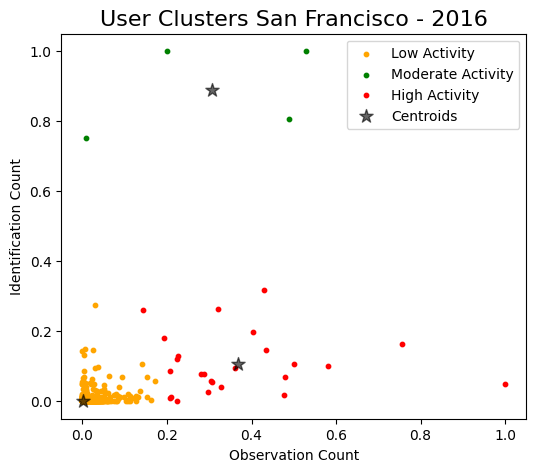

Year: 2016
(      user_id     n_obs  n_idents  cluster     activity_level
110         1  0.488062  0.806343        1  Moderate Activity
2738       14  0.000000  0.000000        0       Low Activity
726        17  0.025541  0.000076        0       Low Activity
15         28  0.429761  0.318618        2      High Activity
1021      147  0.000740  0.000000        0       Low Activity
...       ...       ...       ...      ...                ...
5688  7158309  0.000000  0.000000        0       Low Activity
5698  7286727  0.000000  0.000000        0       Low Activity
5690  7321468  0.000000  0.000000        0       Low Activity
5692  7413809  0.000000  0.000000        0       Low Activity
5697  7504933  0.000000  0.000000        0       Low Activity

[5702 rows x 5 columns], 2.1226090628317023)
Centroids:
       n_obs  n_idents
0  0.002139  0.000355
1  0.788133  0.195980
2  0.219762  0.088030
Sum of Squared Error (SSE): 2.7066671948618897


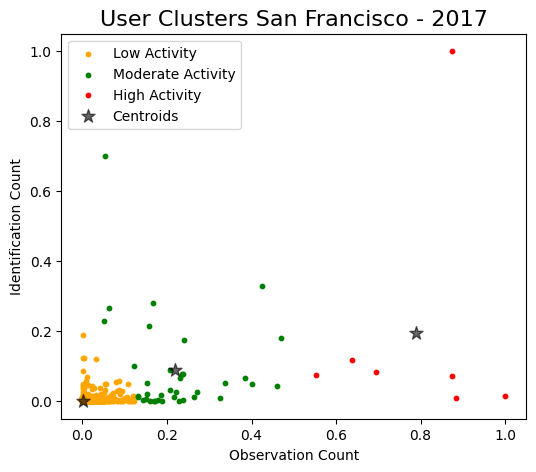

Year: 2017
(      user_id     n_obs  n_idents  cluster     activity_level
107         1  0.423756  0.330579        1  Moderate Activity
4686        5  0.000477  0.000000        0       Low Activity
1413       17  0.014152  0.000083        0       Low Activity
100        28  0.470186  0.181033        1  Moderate Activity
7582       48  0.001113  0.002727        0       Low Activity
...       ...       ...       ...      ...                ...
9049  7453511  0.000000  0.000000        0       Low Activity
9050  7456970  0.000318  0.000000        0       Low Activity
9052  7504933  0.000000  0.000000        0       Low Activity
9053  7581698  0.000318  0.000000        0       Low Activity
9055  7591252  0.000000  0.000000        0       Low Activity

[9061 rows x 5 columns], 2.7066671948618897)
Centroids:
       n_obs  n_idents
0  0.001936  0.000220
1  0.337758  0.025809
2  0.627794  0.867074
Sum of Squared Error (SSE): 2.44802871128547


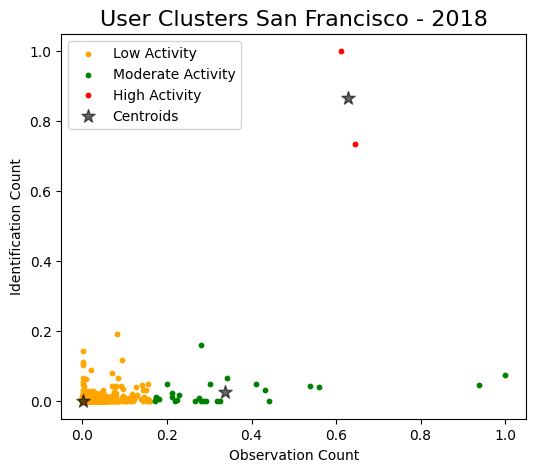

Year: 2018
(       user_id     n_obs  n_idents  cluster     activity_level
428          1  0.280809  0.161235        1  Moderate Activity
2094         5  0.001873  0.000000        0       Low Activity
4184        17  0.028843  0.000060        0       Low Activity
54          28  0.342115  0.065141        1  Moderate Activity
2405        48  0.001124  0.005408        0       Low Activity
...        ...       ...       ...      ...                ...
15999  7463506  0.000125  0.000000        0       Low Activity
15989  7499501  0.000000  0.000000        0       Low Activity
15991  7532518  0.000000  0.000000        0       Low Activity
15992  7535989  0.000000  0.000000        0       Low Activity
16000  7650135  0.000000  0.000000        0       Low Activity

[16002 rows x 5 columns], 2.44802871128547)
Centroids:
       n_obs  n_idents
0  0.131222  0.013874
1  0.611938  0.209037
2  0.001356  0.000121
Sum of Squared Error (SSE): 2.839584595366929


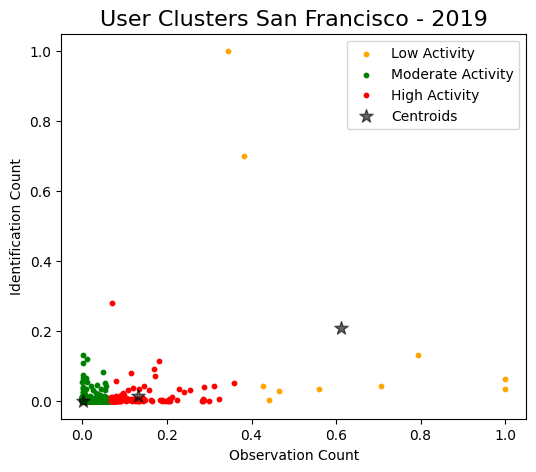

Year: 2019
(       user_id     n_obs  n_idents  cluster     activity_level
326          1  0.168630  0.091925        2      High Activity
5287         5  0.000000  0.000000        1  Moderate Activity
13288       14  0.000000  0.000000        1  Moderate Activity
14981       17  0.007854  0.000890        1  Moderate Activity
102         28  0.254796  0.031606        2      High Activity
...        ...       ...       ...      ...                ...
24343  7601376  0.000000  0.000000        1  Moderate Activity
24355  7610883  0.000000  0.000000        1  Moderate Activity
24359  7620827  0.000337  0.000000        1  Moderate Activity
24353  7631005  0.000000  0.000000        1  Moderate Activity
24360  7650135  0.000673  0.000000        1  Moderate Activity

[24362 rows x 5 columns], 2.839584595366929)
Centroids:
       n_obs  n_idents
0  0.001293  0.000138
1  0.519812  0.166719
2  0.132666  0.022554
Sum of Squared Error (SSE): 3.314791558790349


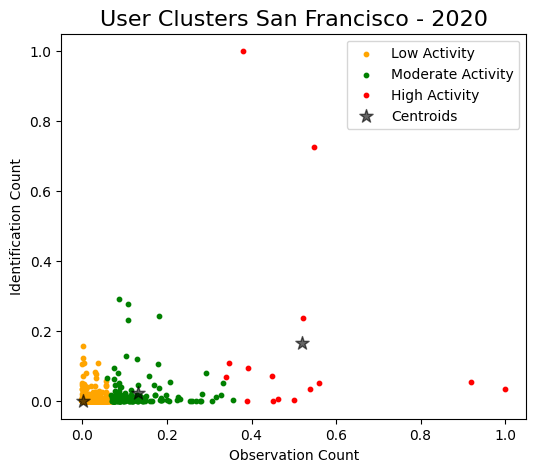

Year: 2020
(       user_id     n_obs  n_idents  cluster     activity_level
592          1  0.180276  0.243016        1  Moderate Activity
8122         5  0.000211  0.000000        0       Low Activity
118         17  0.004952  0.000000        0       Low Activity
269         28  0.347803  0.109972        2      High Activity
13096      128  0.000211  0.000000        0       Low Activity
...        ...       ...       ...      ...                ...
29773  7620827  0.000948  0.000000        0       Low Activity
29778  7645217  0.000000  0.000000        0       Low Activity
29776  7657035  0.000211  0.000000        0       Low Activity
29777  7665133  0.000211  0.000000        0       Low Activity
29780  7678909  0.000000  0.000000        0       Low Activity

[29781 rows x 5 columns], 3.314791558790349)
Centroids:
       n_obs  n_idents
0  0.001113  0.000141
1  0.176300  0.046634
2  1.000000  1.000000
Sum of Squared Error (SSE): 2.926147970761752


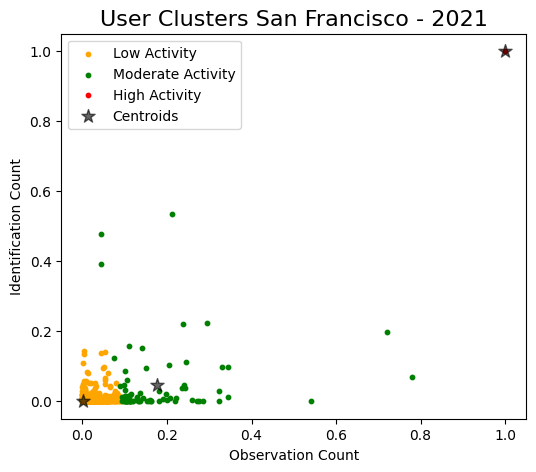

Year: 2021
(       user_id     n_obs  n_idents  cluster     activity_level
309          1  0.141981  0.152107        1  Moderate Activity
3271         5  0.000657  0.000000        0       Low Activity
354         17  0.003944  0.000000        0       Low Activity
79          28  0.205448  0.104405        1  Moderate Activity
8913        39  0.000000  0.000000        0       Low Activity
...        ...       ...       ...      ...                ...
34255  7642727  0.000073  0.000000        0       Low Activity
34259  7645217  0.000219  0.000000        0       Low Activity
34256  7653525  0.000000  0.000000        0       Low Activity
34269  7658721  0.000073  0.000000        0       Low Activity
34260  7660430  0.000000  0.000000        0       Low Activity

[34270 rows x 5 columns], 2.926147970761752)
Centroids:
       n_obs  n_idents
0  0.000981  0.000152
1  0.121038  0.088955
2  0.698269  0.201837
Sum of Squared Error (SSE): 3.265640504505674


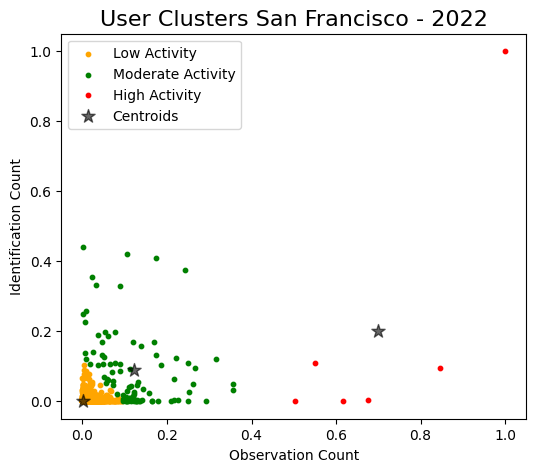

Year: 2022
(       user_id     n_obs  n_idents  cluster     activity_level
1999         1  0.118565  0.167934        1  Moderate Activity
9202         5  0.002340  0.000000        0       Low Activity
10330       17  0.002405  0.000000        0       Low Activity
660         28  0.168487  0.170027        1  Moderate Activity
4343       181  0.005525  0.000000        0       Low Activity
...        ...       ...       ...      ...                ...
34611  7658721  0.000000  0.000000        0       Low Activity
34595  7660430  0.000260  0.000000        0       Low Activity
34618  7669767  0.000130  0.000000        0       Low Activity
34603  7671271  0.000065  0.000000        0       Low Activity
34617  7692510  0.000000  0.000000        0       Low Activity

[34619 rows x 5 columns], 3.265640504505674)
Centroids:
       n_obs  n_idents
0  0.001527  0.000266
1  0.664500  0.133604
2  0.116445  0.312290
Sum of Squared Error (SSE): 4.361158141415379


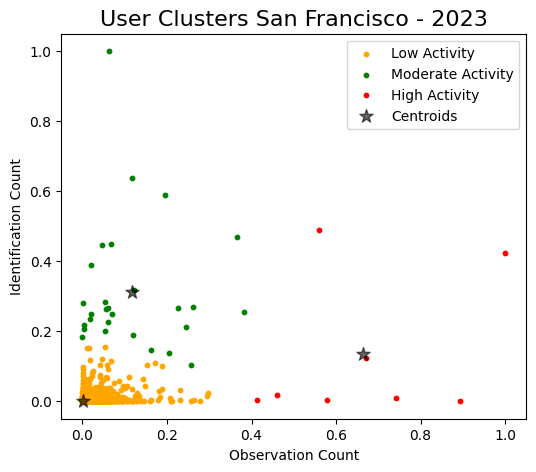

Year: 2023
(       user_id     n_obs  n_idents  cluster activity_level
1972         1  0.067070  0.115412        0   Low Activity
9675         5  0.002438  0.000000        0   Low Activity
14535       17  0.001182  0.000000        0   Low Activity
16          28  0.172847  0.110217        0   Low Activity
13454       48  0.000813  0.000461        0   Low Activity
...        ...       ...       ...      ...            ...
32828  7693948  0.001034  0.000000        0   Low Activity
32832  7694063  0.000074  0.000000        0   Low Activity
32833  7694066  0.000148  0.000000        0   Low Activity
32834  7694092  0.000000  0.000000        0   Low Activity
32837  7694117  0.000000  0.000000        0   Low Activity

[32843 rows x 5 columns], 4.361158141415379)


In [27]:

df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Create a dictionary to store the processed DataFrames for each year
clustered_dfs = {}

# Process each DataFrame
for df, year in zip(df_list, years):
    df['year'] = year  # Add year information to handle manual reassignment
    df_processed, scaler = selectfeature(df)
    df_clustered = perform_kmeans_clustering(df_processed, year)
    
    # Store the resulting DataFrame in the dictionary
    clustered_dfs[year] = df_clustered

    # Print to verify (optional)
    print(f"Year: {year}")
    print(df_clustered)
    
    df_2016_clustered = clustered_dfs[2016]
    df_2016_clustered

In [28]:
df_2019_clustered = clustered_dfs[2019]
df_2019_clustered

(       user_id     n_obs  n_idents  cluster     activity_level
 326          1  0.168630  0.091925        2      High Activity
 5287         5  0.000000  0.000000        1  Moderate Activity
 13288       14  0.000000  0.000000        1  Moderate Activity
 14981       17  0.007854  0.000890        1  Moderate Activity
 102         28  0.254796  0.031606        2      High Activity
 ...        ...       ...       ...      ...                ...
 24343  7601376  0.000000  0.000000        1  Moderate Activity
 24355  7610883  0.000000  0.000000        1  Moderate Activity
 24359  7620827  0.000337  0.000000        1  Moderate Activity
 24353  7631005  0.000000  0.000000        1  Moderate Activity
 24360  7650135  0.000673  0.000000        1  Moderate Activity
 
 [24362 rows x 5 columns],
 2.839584595366929)

In [29]:
df_2021_clustered = clustered_dfs[2021]
df_2021_clustered

(       user_id     n_obs  n_idents  cluster     activity_level
 309          1  0.141981  0.152107        1  Moderate Activity
 3271         5  0.000657  0.000000        0       Low Activity
 354         17  0.003944  0.000000        0       Low Activity
 79          28  0.205448  0.104405        1  Moderate Activity
 8913        39  0.000000  0.000000        0       Low Activity
 ...        ...       ...       ...      ...                ...
 34255  7642727  0.000073  0.000000        0       Low Activity
 34259  7645217  0.000219  0.000000        0       Low Activity
 34256  7653525  0.000000  0.000000        0       Low Activity
 34269  7658721  0.000073  0.000000        0       Low Activity
 34260  7660430  0.000000  0.000000        0       Low Activity
 
 [34270 rows x 5 columns],
 2.926147970761752)

In [30]:
#

# AgglomerativeClustering

In [35]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering as AggClust
import sys

In [36]:

# Increase the recursion limit if needed 
sys.setrecursionlimit(100)

def selectfeature(df):# without log transformation
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Scale the features
    scaler = MinMaxScaler().fit(df_std[['n_obs', 'n_idents']])
    df_std[['n_obs', 'n_idents']] = scaler.transform(df_std[['n_obs', 'n_idents']])

    # Sort by user_id (optional, for consistency)
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def reorder_labels(df, labels):
    # Create a DataFrame 
    df_clusters = pd.DataFrame({'cluster': labels, 'n_obs': df['n_obs'], 'n_idents': df['n_idents']})

    # Calculate an aggregate metric (e.g., median) to sort clusters
    sorted_order = df_clusters.groupby('cluster').median().sort_values(by=['n_obs', 'n_idents']).index

    # Map old labels to new labels based on the sorted order
    new_labels = np.zeros_like(labels)
    for new_label, old_label in enumerate(sorted_order):
        new_labels[labels == old_label] = new_label
    
    df['cluster'] = new_labels
    return df

def perform_agglomerative_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Perform Agglomerative Clustering
    agglomerative = AggClust(n_clusters=3, metric='euclidean').fit(df[['n_obs', 'n_idents']])
    df['cluster'] = agglomerative.labels_
    
    # Reorder labels - Low Activity, Moderate Activity, and High Activity to be consistent
    df = reorder_labels(df, agglomerative.labels_)

    # Assign labels based on the reordered clusters
    cluster_mapping = {0: 'Low Activity', 1: 'Moderate Activity', 2: 'High Activity'}
    df['activity_level'] = df['cluster'].map(cluster_mapping)

    return df

def plot_clusters(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Plotting all the clusters
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], 
                    s=10, color=palette[i], label=df['activity_level'].unique()[i])
        
    # Set title and labels
    plt.title(f'Agglomerative Clustering - San Francisco {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()
    
def plot_dendrogram(df):
    # Plotting the dendrogram
    plt.figure(figsize=(10, 7))
    Z = linkage(df[['n_obs', 'n_idents']], method='ward')
    dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean Distances')
    plt.show()


In [33]:
df_std, scaler = selectfeature(df)
df_clustered = perform_agglomerative_clustering(df_std, 2019)

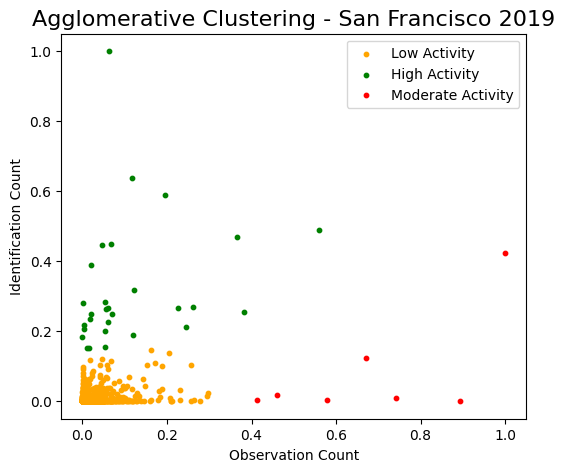

In [33]:
plot_cluster = plot_clusters(df_clustered,2019)

In [33]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_agglomerative_clustering(df_processed, year)


NameError: name 'perform_agglomerative_clustering' is not defined

In [ ]:
## Dendrograms 

In [ ]:
def plot_dendrogram(df,year):
    # Plotting the dendrogram
    plt.figure(figsize=(10, 7))
    Z = linkage(df[['n_obs', 'n_idents']], method='ward')
    dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean Distances')
    plt.show()

In [ ]:
plot_dendrogram(df_std,2019)

In [37]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

# Non Linear Clustering 
## DBSCAN

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
def selectfeature(df):
    # Select features
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column 
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to  two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def perform_dbscan_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']  # 
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=0.2, min_samples=5).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = dbscan.labels_
    
    # Count of unique clusters
    labels = dbscan.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    print(f'Estimated number of clusters: {n_clusters}')
    print(f'Estimated number of noise points: {n_noise}')
    
    # Get unique cluster labels
    unique_labels = set(labels)
    print("Unique labels (clusters):", unique_labels)

    # Plot clusters
    plt.figure(figsize=(6, 5))
    
    # Iterate over unique labels
    for label in unique_labels:
        # Assign color or use black for noise
        if label == -1:
            color = 'black'
            label_name = 'Noise'
        else:
            color = palette[label % len(palette)]
            label_name = f'Cluster {label}'
        
        # Filter data points belonging to the current label
        cluster_data = df[df['cluster'] == label]
        plt.scatter(cluster_data['n_obs'], cluster_data['n_idents'], 
                    s=10, color=color, label=label_name)
    
    # Set title and labels
    plt.title(f'DBScan clustering - San Francisco {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()

    return df
#test
# df_std, scaler = selectfeature(df)
# df_clustered = perform_dbscan_clustering(df_std, 2023)


Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


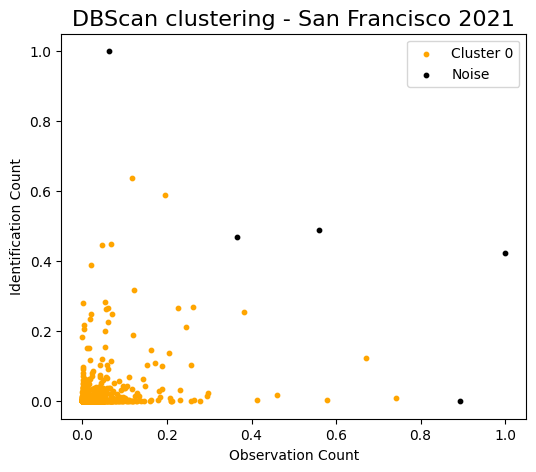

In [22]:
df_std, scaler = selectfeature(df)
df_clustered = perform_dbscan_clustering(df_std, 2021)

Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


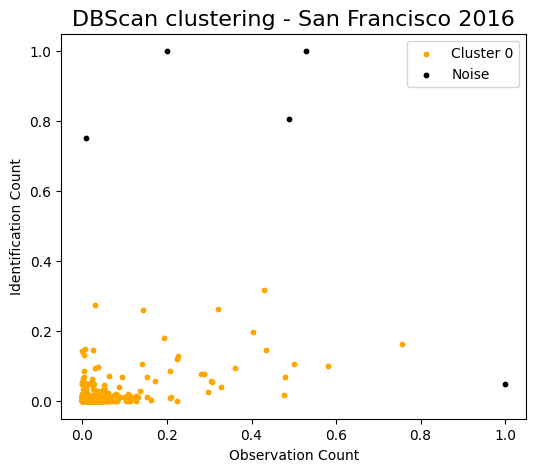

Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


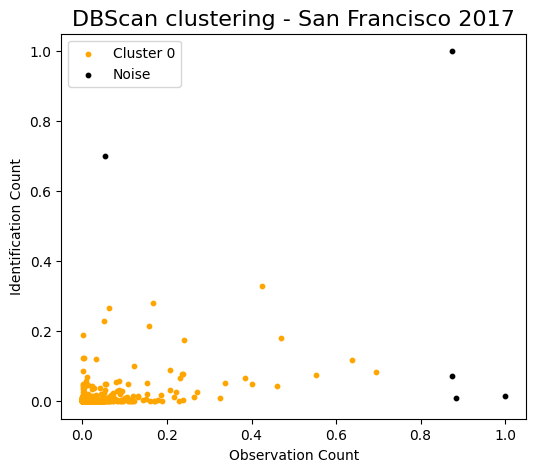

Estimated number of clusters: 1
Estimated number of noise points: 4
Unique labels (clusters): {0, -1}


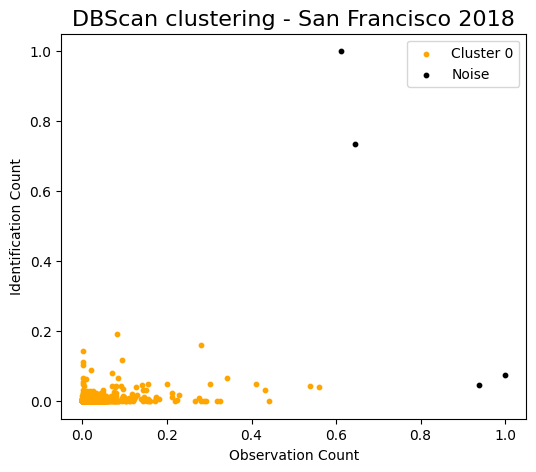

Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


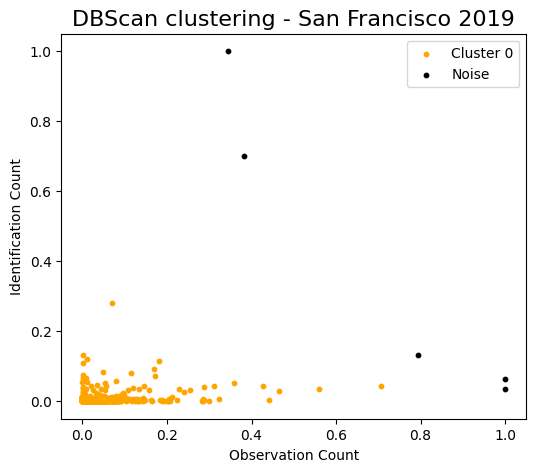

Estimated number of clusters: 1
Estimated number of noise points: 4
Unique labels (clusters): {0, -1}


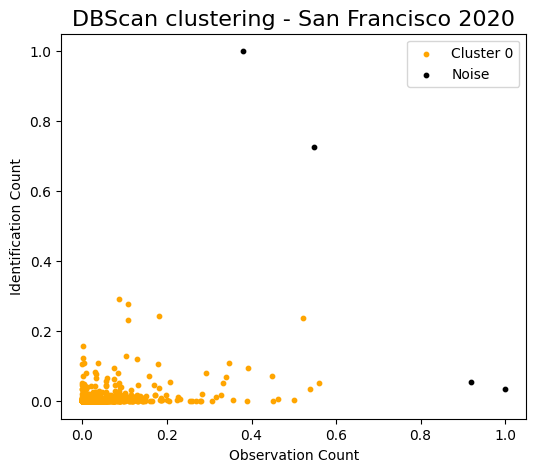

Estimated number of clusters: 1
Estimated number of noise points: 6
Unique labels (clusters): {0, -1}


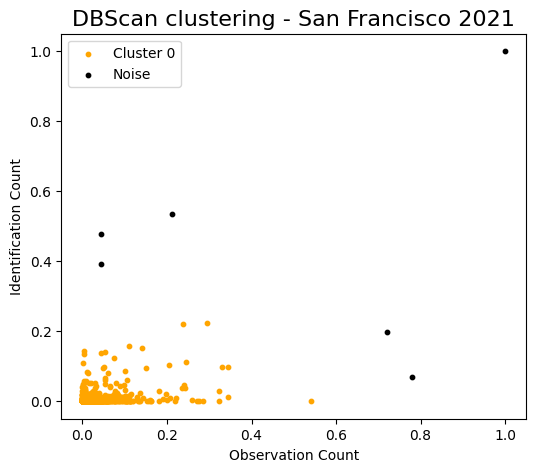

Estimated number of clusters: 1
Estimated number of noise points: 1
Unique labels (clusters): {0, -1}


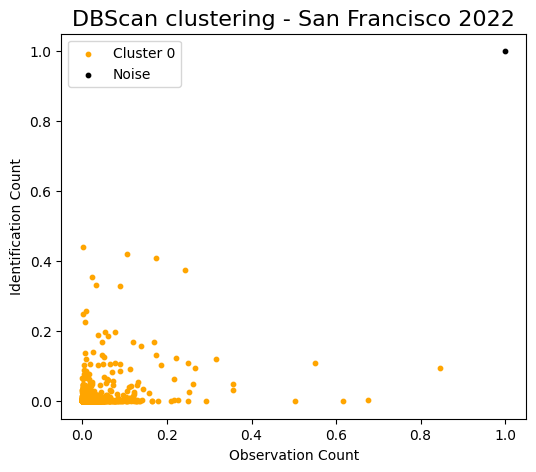

Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


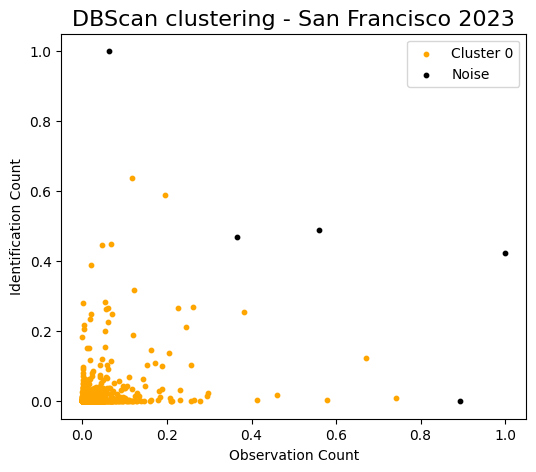

In [23]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_dbscan_clustering(df_processed, year)

In [ ]:
# merge all  DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
combined_df_dbscan = pd.concat(df_list)

# Process the combined DataFrame
df_combined_processed, scaler_combined = selectfeature(combined_df_dbscan)

# Perform clustering 
perform_dbscan_clustering(df_combined_processed, "combined")

# Gaussian Mixture Model (GMM)

In [24]:
from sklearn.mixture import GaussianMixture

In [30]:
def selectfeature(df):
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column in the transformation
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to those two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def perform_gmm_clustering(df, year):
    palette = ['orange', 'green', 'red']  # Low to High Activity
    gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
    df['cluster'] = gmm.fit_predict(df[['n_obs', 'n_idents']])

    means = gmm.means_
    sorted_indices = np.argsort(means[:, 0])  # Sort by `n_obs` for consistent labeling
    new_labels = np.zeros_like(df['cluster'])
    for old_label, new_label in enumerate(sorted_indices):
        new_labels[df['cluster'] == old_label] = new_label
    df['cluster'] = new_labels  # Apply new labels

    means_df = pd.DataFrame(means, columns=['n_obs', 'n_idents'])
    log_likelihood = gmm.score(df[['n_obs', 'n_idents']])
    
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], color=palette[i],s=30)
    plt.scatter(means[:, 0], means[:, 1], c='black', s=30, alpha=0.6, marker='*')
    plt.title(f'GMM Clusters San Francisco- {year}')
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend(['Low Activity', 'Moderate Activity', 'High Activity', 'Means'])
    plt.show()

    return df, log_likelihood
# test
# df_std, scaler = selectfeature(df)
# df_clustered, log_likelihood = perform_gmm_clustering(df_std, 2023)


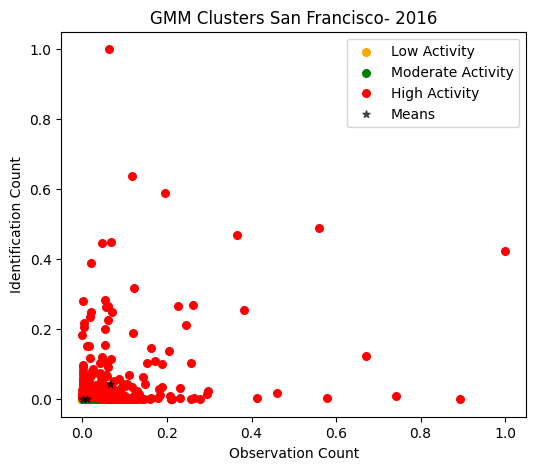

In [31]:
df_std, scaler = selectfeature(df)
df_clustered = perform_gmm_clustering(df_std, 2016)

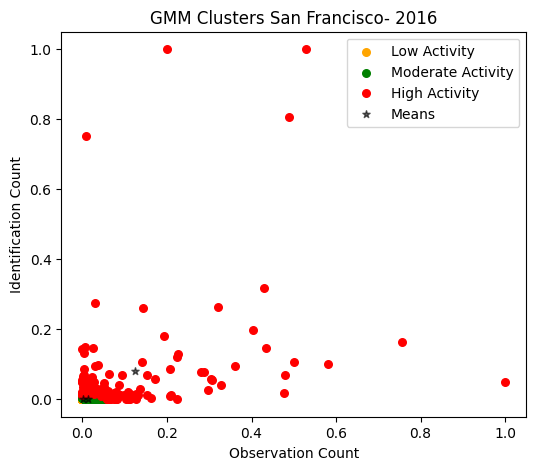

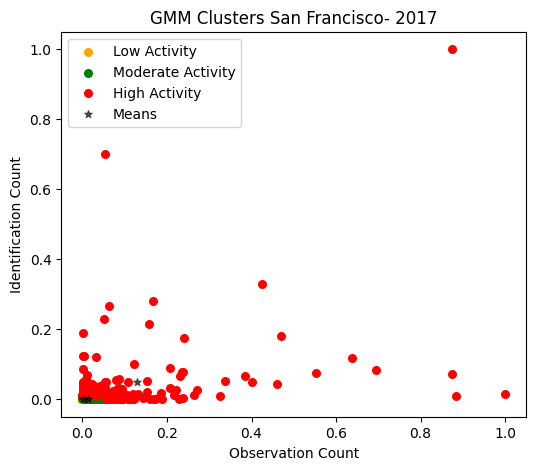

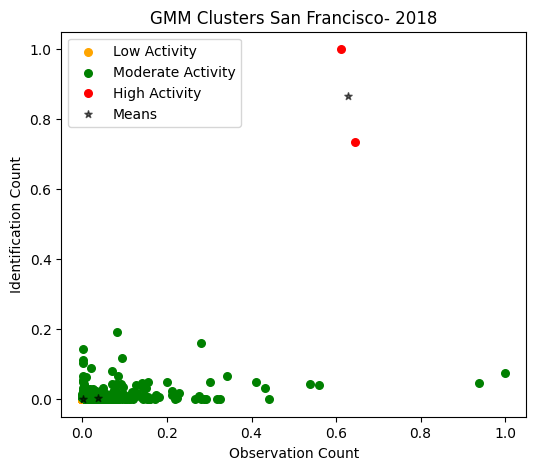

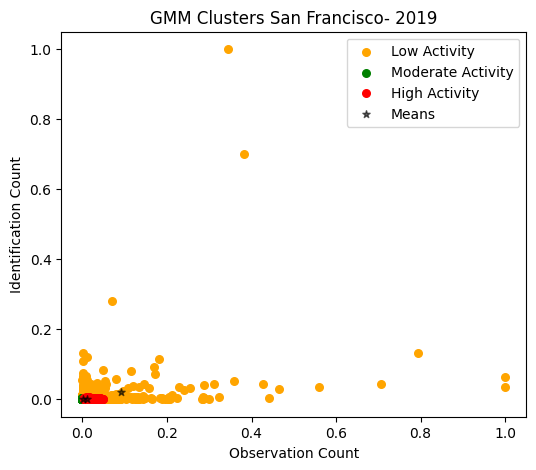

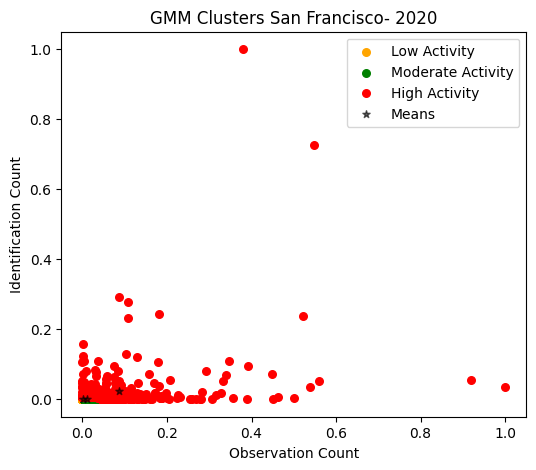

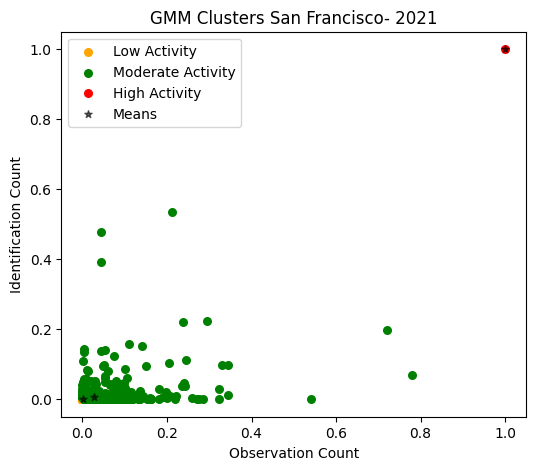

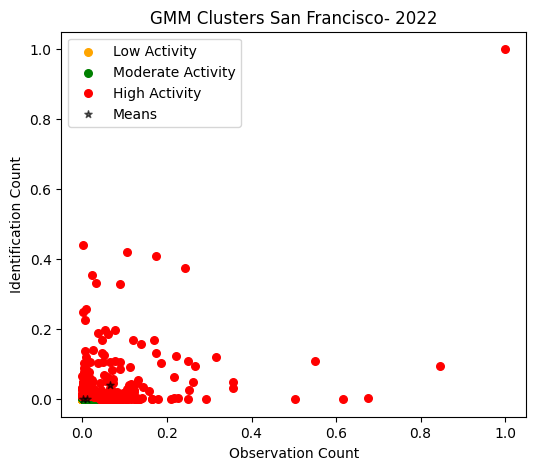

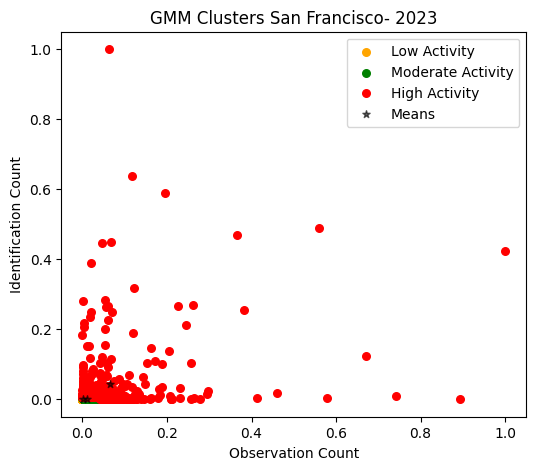

In [32]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_gmm_clustering(df_processed, year)

In [ ]:
## Evaluating the scores to find the better model

In [28]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score


In [29]:
# 4 clusters tried above
clusters_kmeans = kmeans.labels_
clusters_agg = agg.labels_
clusters_dbscan = dbscan.labels_
clusters_gmm = gmm.predict(features_scaled)

# calculate the values for scaled dataset
print("Silhouette Scores:")
print("K-means:", silhouette_score(selectfeature, clusters_kmeans))
print("Agglomerative:", silhouette_score(selectfeature, clusters_agg))
print("DBSCAN:", silhouette_score(selectfeature, clusters_dbscan))
print("GMM:", silhouette_score(selectfeature, clusters_gmm))

NameError: name 'kmeans' is not defined